In [1]:
%load_ext autoreload
%autoreload 2
import warnings
import numpy as np
import time
import os
from dotenv import load_dotenv
os.environ["USE_PYGEOS"] = "0"
import napari_sparrow as nas
from spatialdata import read_zarr
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import sample 
import scanpy as sc
import seaborn as sns
import anndata as ad
%run own_and_modified_functions.ipynb
warnings.simplefilter(action='ignore')

the value of the environment variable BASIC_DCT_BACKEND is not in ["JAX","SCIPY"]


In [2]:
OUTPUT_DIR = '/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/D2-1'
#sdata = read_zarr( os.path.join(  OUTPUT_DIR, 'sdata.zarr'  ) )
name_anndata = "anndataNucD21"
sample = "D21"
anndata = sc.read(OUTPUT_DIR + '/' + name_anndata) # get original anndata after Sparrow

In [3]:
# Make UMAP
n_pca = np.count_nonzero(anndata.uns['pca']['variance_ratio'] > 0.01)
make_umap(anndata,n_PCAs=n_pca,n_neighbors=15)

Hepa            40.801981
Kupf            11.925873
LSEC            11.742152
Stel             6.589983
Chol             5.895040
Oth im           5.551562
Unknown          5.120217
B cell           3.115265
Portal vein      3.035386
Fibr             1.957025
Central vein     1.821232
Meso             1.341960
Portal LAM       1.102324
Name: annotation_own_score_genes_BasicMartin_12, dtype: float64


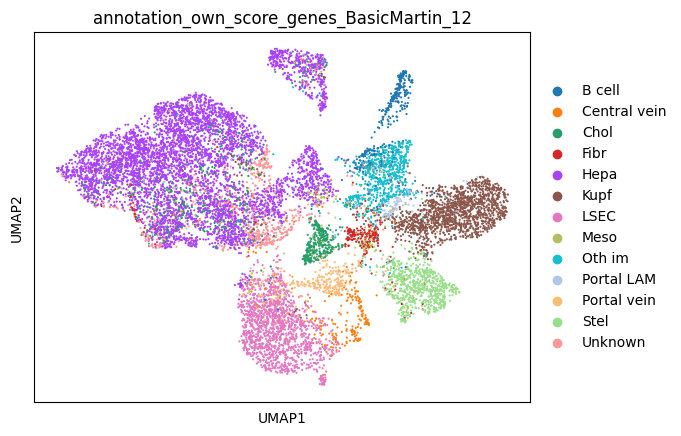

Percentage of cells with changed annotation: 11.59


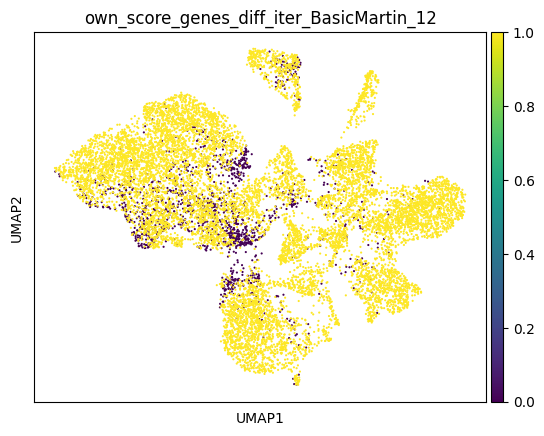

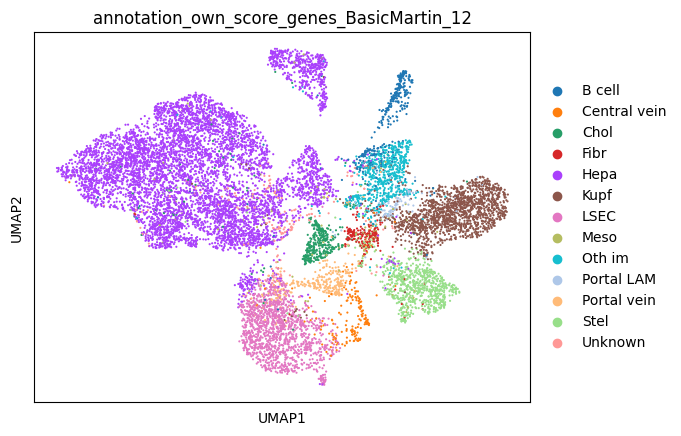

Hepa            50.890646
Kupf            11.893921
LSEC            11.302820
Stel             6.030833
Oth im           5.176132
Chol             3.091301
B cell           2.987459
Portal vein      2.412333
Fibr             1.589584
Central vein     1.453790
Unknown          1.381900
Meso             0.918604
Portal LAM       0.870677
Name: annotation_own_score_genes_BasicMartin_12, dtype: float64
Percentage of cells with changed annotation: 1.73


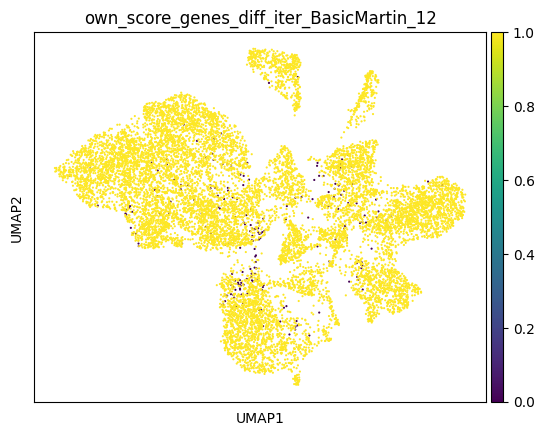

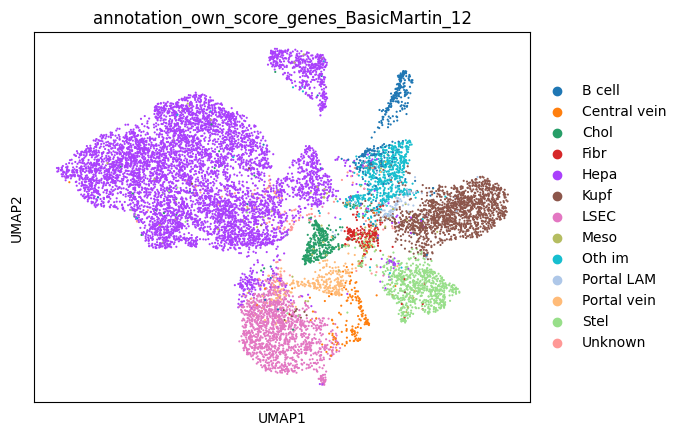

Hepa            52.216631
Kupf            11.838006
LSEC            11.183002
Stel             5.974918
Oth im           5.080278
B cell           3.011423
Chol             2.779775
Portal vein      2.308491
Fibr             1.517693
Central vein     1.357936
Unknown          1.038422
Meso             0.894640
Portal LAM       0.798786
Name: annotation_own_score_genes_BasicMartin_12, dtype: float64
Percentage of cells with changed annotation: 0.31


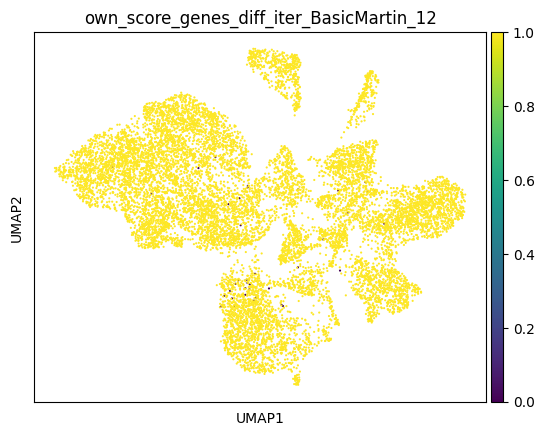

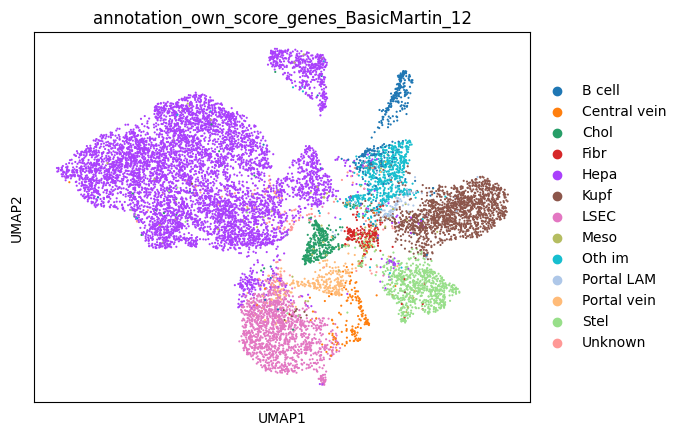

Hepa            52.392364
Kupf            11.822031
LSEC            11.119099
Stel             5.958942
Oth im           5.056314
B cell           3.019410
Chol             2.755811
Portal vein      2.268552
Fibr             1.525681
Central vein     1.349948
Unknown          1.062385
Meso             0.878664
Portal LAM       0.790798
Name: annotation_own_score_genes_BasicMartin_12, dtype: float64
Percentage of cells with changed annotation: 0.04
converged


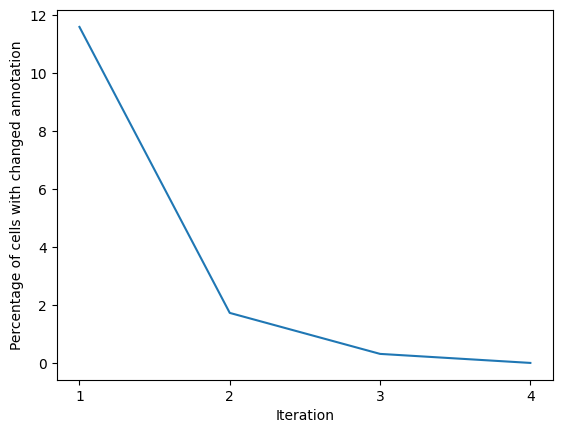

In [4]:
path_mg_BasicMartin = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/BasicMartin.csv"
score_matrix_Martin, score_matrix_Martin_before_min_score = own_score_genes_iterative(anndata,path_mg_BasicMartin,nr_iterations=8,suffix='_BasicMartin_12',save=True,saved_as=sample+'_convergence_BasicMartin_12')

In [5]:
score_matrix_Martin

,Hepa,LSEC,Portal vein,Central vein,Chol,Kupf,Stel,Fibr,B cell,Meso,Portal LAM,Oth im
0,NaN,0.061630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.560092,NaN,NaN,NaN,0.081525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.305538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,0.336942,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
12514,1.624262,NaN,NaN,NaN,0.121328,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12515,1.078326,NaN,NaN,NaN,0.108271,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12516,0.565853,0.272562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12517,0.405162,NaN,NaN,NaN,2.890161,NaN,NaN,NaN,NaN,NaN,0.170067,NaN


In [6]:
score_matrix_Martin_before_min_score

,Hepa,LSEC,Portal vein,Central vein,Chol,Kupf,Stel,Fibr,B cell,Meso,Portal LAM,Oth im
0,-0.046833,0.061630,-0.015972,-0.125043,-0.054066,-0.334582,-0.097296,-0.282882,-0.353813,-0.263575,-0.315254,-0.121225
1,0.560092,-0.496977,-0.644447,-0.573954,0.081525,-0.426706,-0.322489,-0.336323,-0.353813,-0.263575,-0.532820,-0.447941
2,0.305538,-0.496977,-0.644447,-0.573954,-0.152610,-0.426706,-0.447668,-0.461502,-0.353813,-0.263575,-0.532820,-0.447941
3,-0.275805,-0.496977,-0.644447,-0.573954,-0.498643,0.336942,-0.497018,-0.510852,-0.353813,-0.263575,-0.058675,-0.447941
4,-0.250608,-0.095407,-0.418677,-0.412690,-0.364382,-0.426706,-0.313754,-0.435911,-0.353813,-0.263575,-0.532820,-0.447941
...,...,...,...,...,...,...,...,...,...,...,...,...
12514,1.624262,-0.406195,-0.644447,-0.573954,0.121328,-0.349293,-0.296611,-0.310444,-0.353813,-0.263575,-0.503295,-0.447941
12515,1.078326,-0.469361,-0.644447,-0.573954,0.108271,-0.344042,-0.375095,-0.433631,-0.353813,-0.263575,-0.422601,-0.447941
12516,0.565853,0.272562,-0.397552,-0.397600,-0.145665,-0.343954,-0.411550,-0.425384,-0.353813,-0.263575,-0.422484,-0.447941
12517,0.405162,-0.496977,-0.179722,-0.242007,2.890161,-0.426706,-0.072989,-0.439321,-0.353813,-0.263575,0.170067,-0.060669


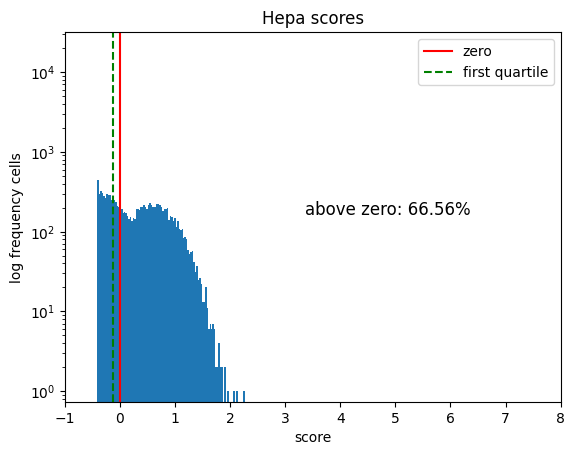

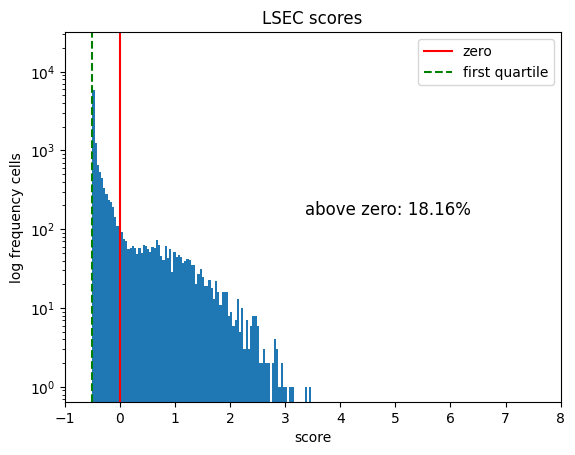

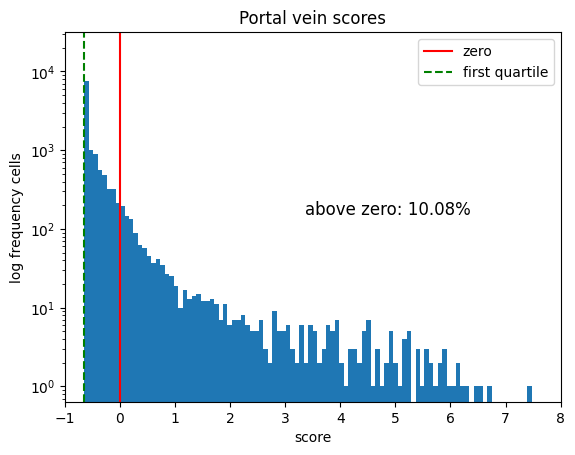

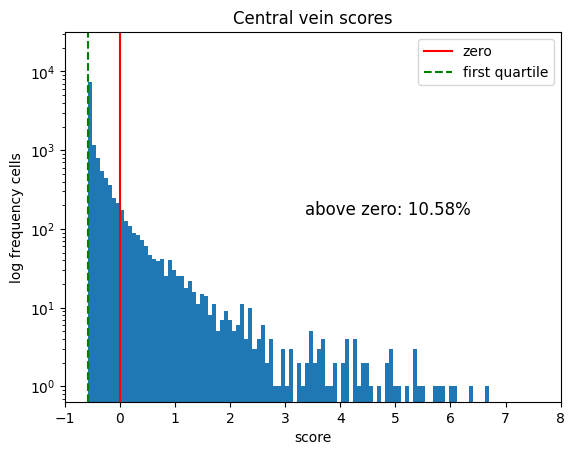

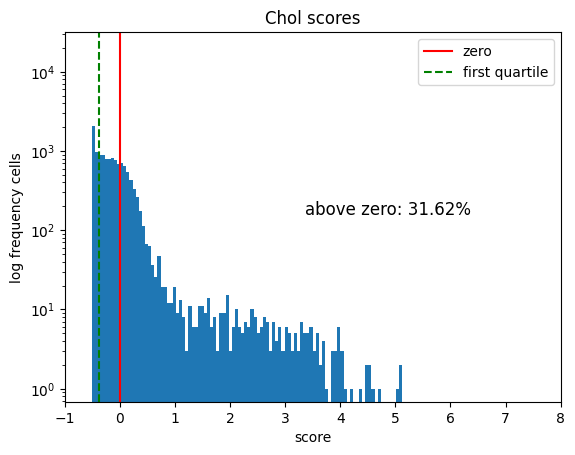

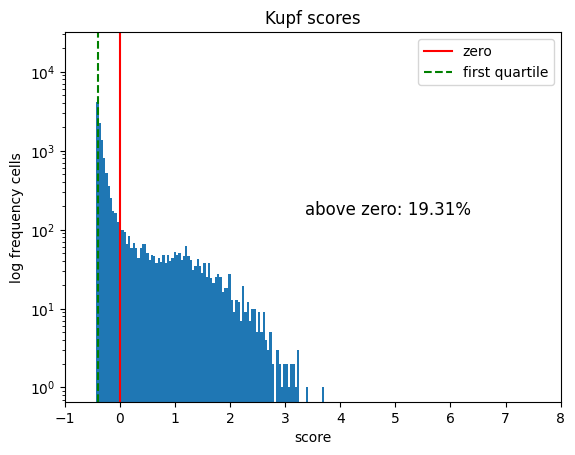

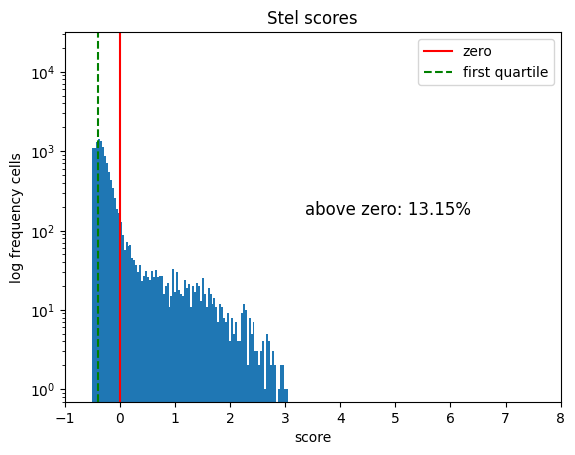

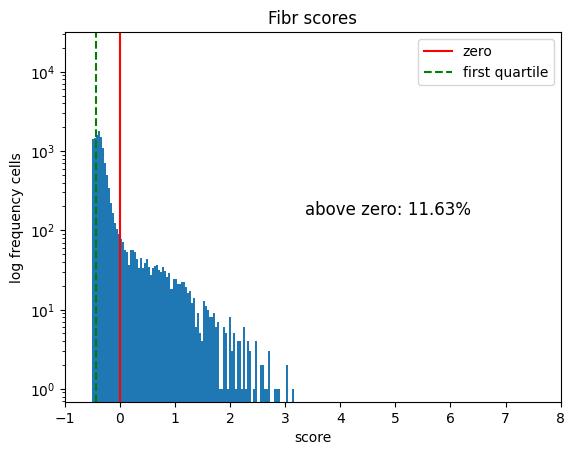

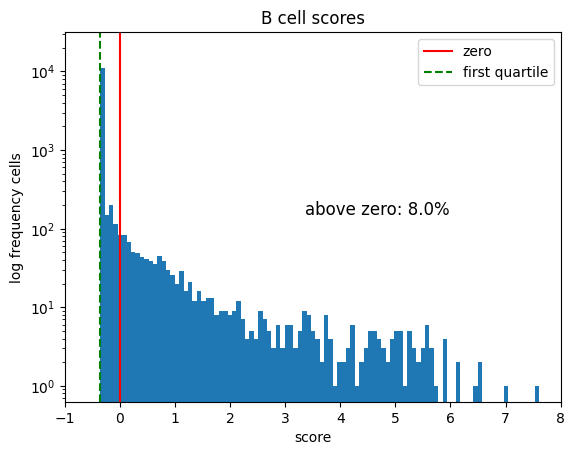

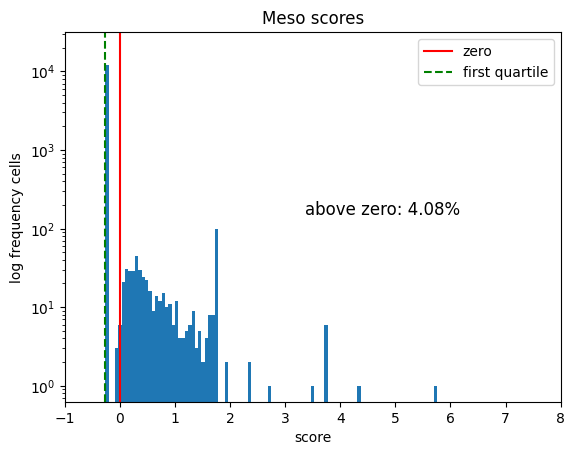

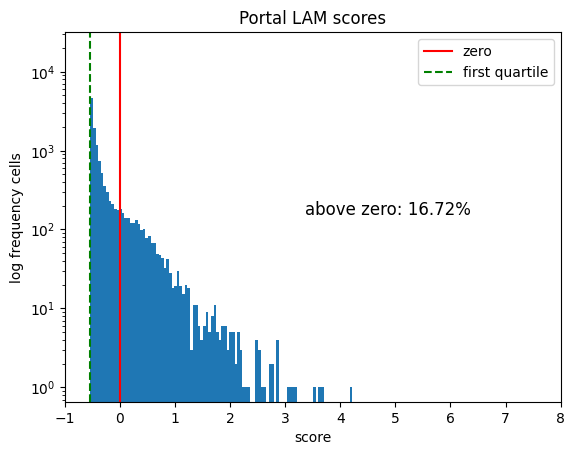

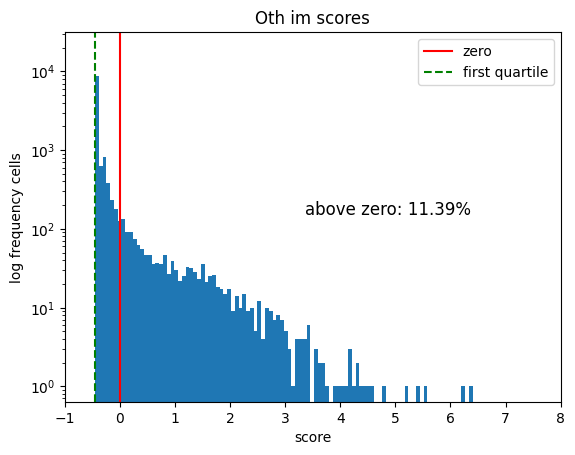

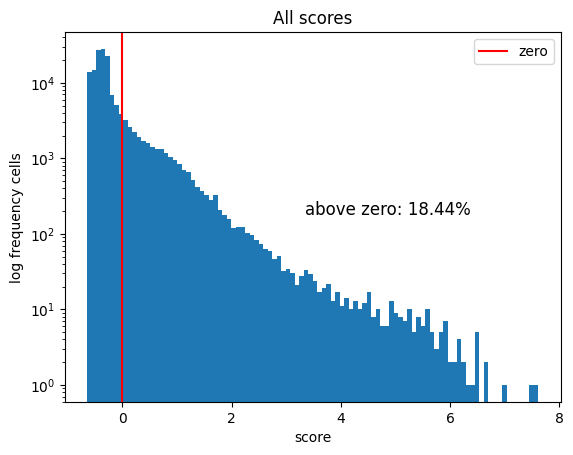

In [7]:
# make a histogram each column in score_matrix_Martin_before_min_score
for i in range(score_matrix_Martin_before_min_score.shape[1]):
    plt.hist(score_matrix_Martin_before_min_score.iloc[:,i], bins=100,log=True)
    ax = plt.gca()
    ax.set_xlim([-1,8])
    ax.set_ylim([0,pow(10,4.5)])
    # add vertical line at 0
    plt.axvline(x=0, color='r', linestyle='-')
    # show percentage right of the vertical line
    plt.text(0.5, 0.5, 'above zero: '+str(round(100*sum(score_matrix_Martin_before_min_score.iloc[:,i]>0)/len(score_matrix_Martin_before_min_score.iloc[:,i]),2))+'%', fontsize=12, transform=plt.gcf().transFigure)
    # show fraction right of the vertical line and mention 'right of 0'
    #plt.text(0.6, 0.5, 'above 0', fontsize=12, transform=plt.gcf().transFigure)
    # add vertical line at first quartile
    plt.axvline(x=score_matrix_Martin_before_min_score.iloc[:,i].quantile(0.25), color='g', linestyle='--')
    plt.title(score_matrix_Martin_before_min_score.columns[i]+' scores')
    # ad legend
    plt.legend(['zero','first quartile'])
    # y as
    plt.ylabel('log frequency cells')
    plt.xlabel('score')
    plt.show()

# make plot for all columns together
plt.hist(score_matrix_Martin_before_min_score.values.flatten(), bins=100,log=True)
plt.axvline(x=0, color='r', linestyle='-')
# show percentage right of the vertical line
plt.text(0.5, 0.5, 'above zero: '+str(round(100*sum(score_matrix_Martin_before_min_score.values.flatten()>0)/len(score_matrix_Martin_before_min_score.values.flatten()),2))+'%', fontsize=12, transform=plt.gcf().transFigure)
# ad legend
plt.legend(['zero'])
plt.title('All scores')
# y as
plt.ylabel('log frequency cells')
plt.xlabel('score')
plt.show()

Hepa       43.358096
Endo       14.761562
Kupf       12.301302
Strom       8.834571
Oth im      7.244988
Unknown     7.173097
Chol        3.738318
B cell      2.588066
Name: annotation_own_score_genes_Atlas, dtype: float64


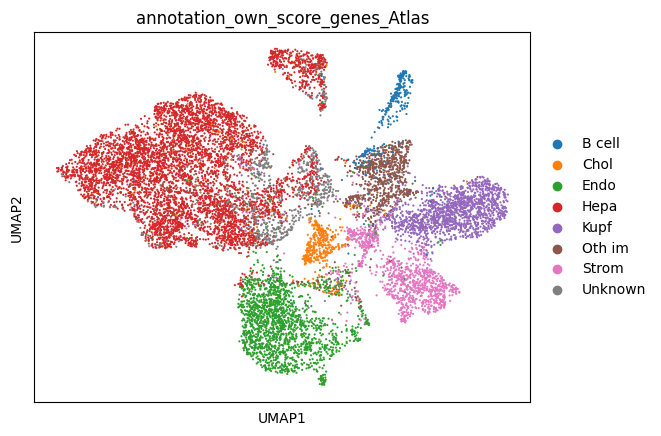

Percentage of cells with changed annotation: 8.95


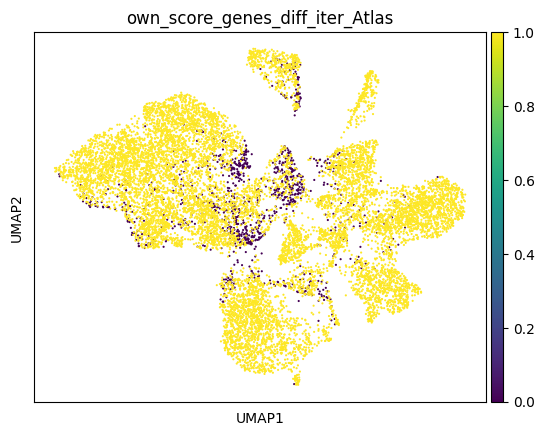

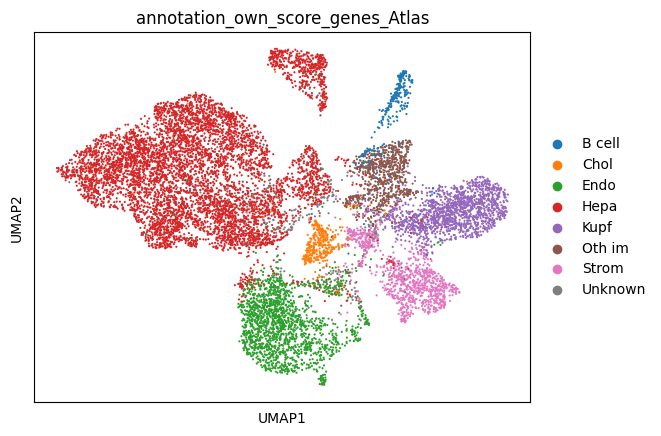

Hepa       51.162233
Endo       14.569854
Kupf       11.949836
Strom       8.267434
Oth im      6.597971
Chol        3.067338
B cell      2.316479
Unknown     2.068855
Name: annotation_own_score_genes_Atlas, dtype: float64
Percentage of cells with changed annotation: 0.8


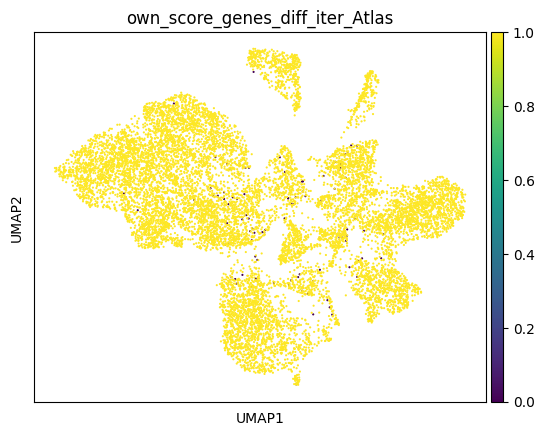

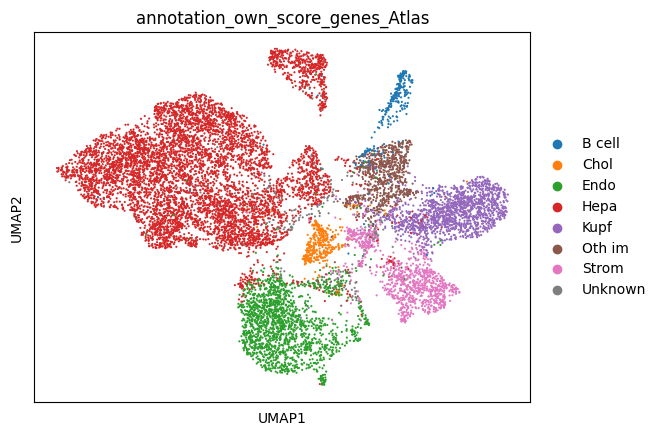

Hepa       51.737359
Endo       14.553878
Kupf       11.941848
Strom       8.163591
Oth im      6.534068
Chol        2.979471
B cell      2.260564
Unknown     1.829220
Name: annotation_own_score_genes_Atlas, dtype: float64
Percentage of cells with changed annotation: 0.06


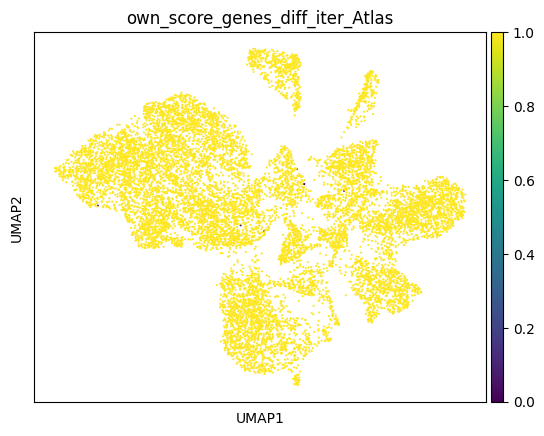

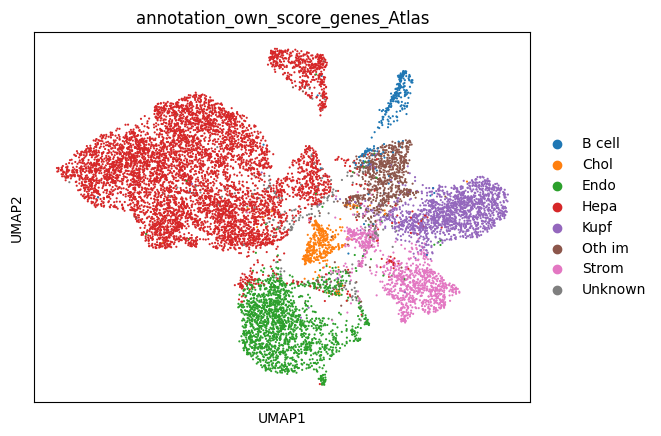

Hepa       51.801262
Endo       14.529915
Kupf       11.933861
Strom       8.163591
Oth im      6.526080
Chol        2.979471
B cell      2.260564
Unknown     1.805256
Name: annotation_own_score_genes_Atlas, dtype: float64
Percentage of cells with changed annotation: 0.01
converged


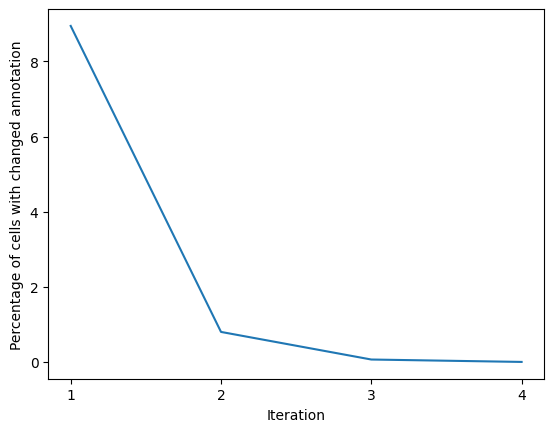

In [8]:
path_mg = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/AtlasTopLevelScores.csv"
score_matrix_atlas_scores_7, score_matrix_atlas_scores_7_before_min_score = own_score_genes_iterative(anndata,path_mg,nr_iterations=8,suffix='_Atlas',save=True,saved_as=sample+'_convergence_BasicMartin_12')

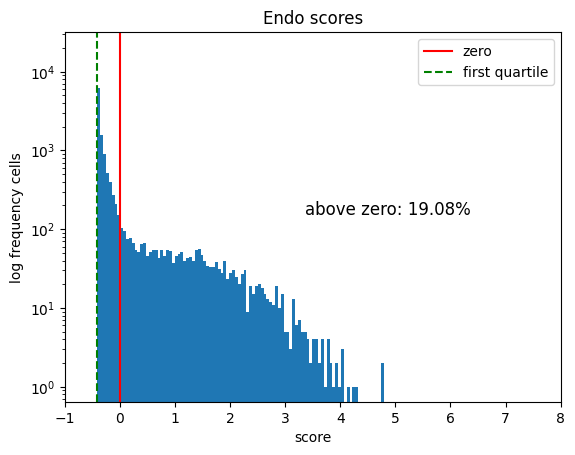

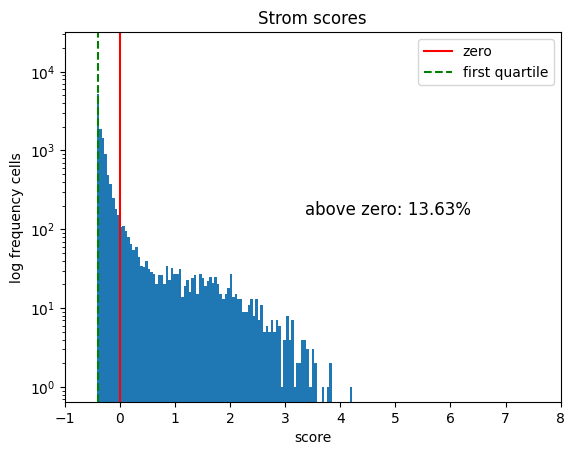

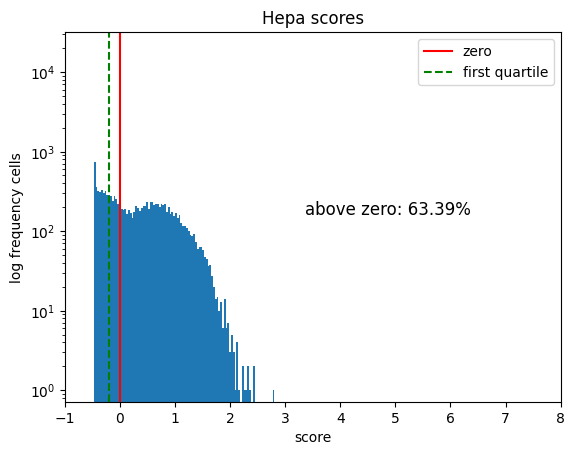

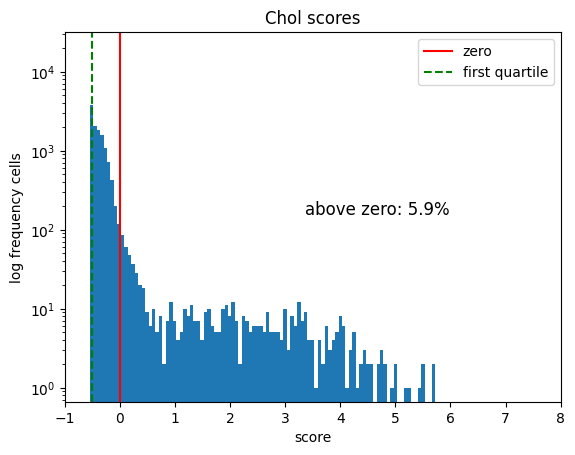

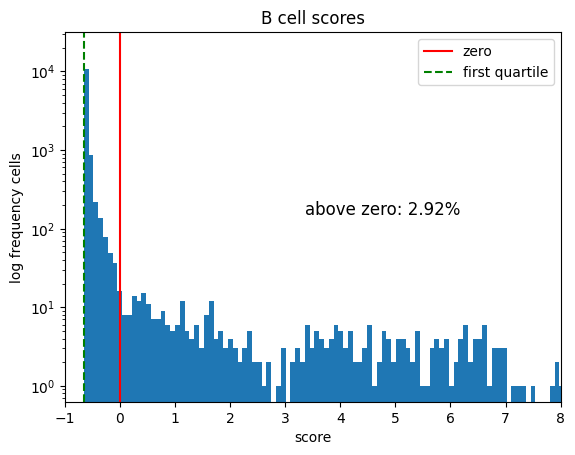

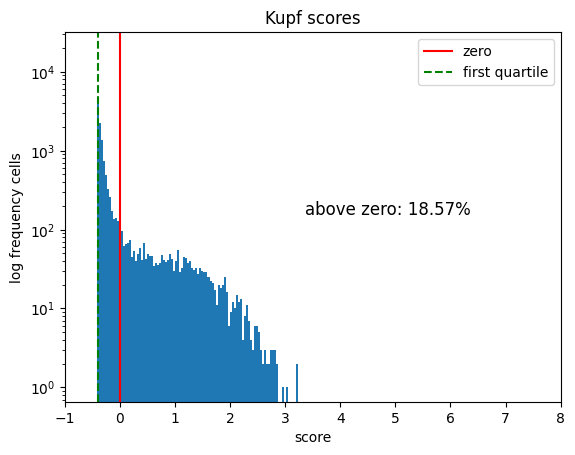

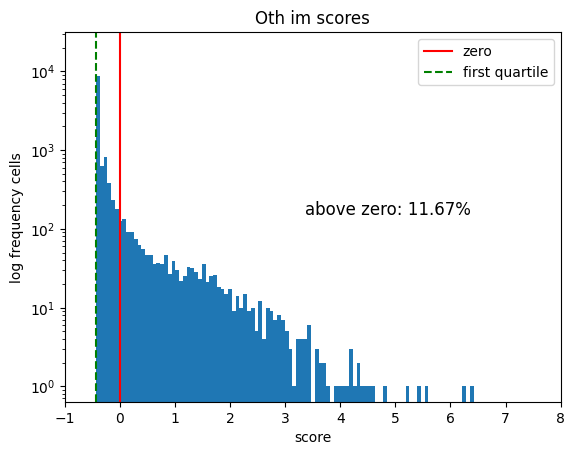

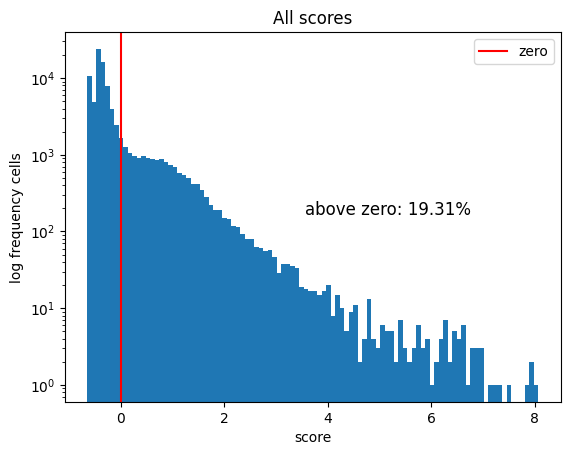

In [9]:
for i in range(score_matrix_atlas_scores_7_before_min_score.shape[1]):
    plt.hist(score_matrix_atlas_scores_7_before_min_score.iloc[:,i], bins=100,log=True)
    ax = plt.gca()
    ax.set_xlim([-1,8])
    ax.set_ylim([0,pow(10,4.5)])
    # add vertical line at 0
    plt.axvline(x=0, color='r', linestyle='-')
    # show percentage right of the vertical line
    plt.text(0.5, 0.5, 'above zero: '+str(round(100*sum(score_matrix_atlas_scores_7_before_min_score.iloc[:,i]>0)/len(score_matrix_atlas_scores_7_before_min_score.iloc[:,i]),2))+'%', fontsize=12, transform=plt.gcf().transFigure)
    # show fraction right of the vertical line and mention 'right of 0'
    #plt.text(0.6, 0.5, 'above 0', fontsize=12, transform=plt.gcf().transFigure)
    # add vertical line at first quartile
    plt.axvline(x=score_matrix_atlas_scores_7_before_min_score.iloc[:,i].quantile(0.25), color='g', linestyle='--')
    plt.title(score_matrix_atlas_scores_7_before_min_score.columns[i]+' scores')
    # ad legend
    plt.legend(['zero','first quartile'])
    # y as
    plt.ylabel('log frequency cells')
    plt.xlabel('score')
    plt.show()

# make plot for all columns together
plt.hist(score_matrix_atlas_scores_7_before_min_score.values.flatten(), bins=100,log=True)
plt.axvline(x=0, color='r', linestyle='-')
# show percentage right of the vertical line
plt.text(0.5, 0.5, 'above zero: '+str(round(100*sum(score_matrix_atlas_scores_7_before_min_score.values.flatten()>0)/len(score_matrix_atlas_scores_7_before_min_score.values.flatten()),2))+'%', fontsize=12, transform=plt.gcf().transFigure)
# ad legend
plt.legend(['zero'])
plt.title('All scores')
# y as
plt.ylabel('log frequency cells')
plt.xlabel('score')
plt.show()

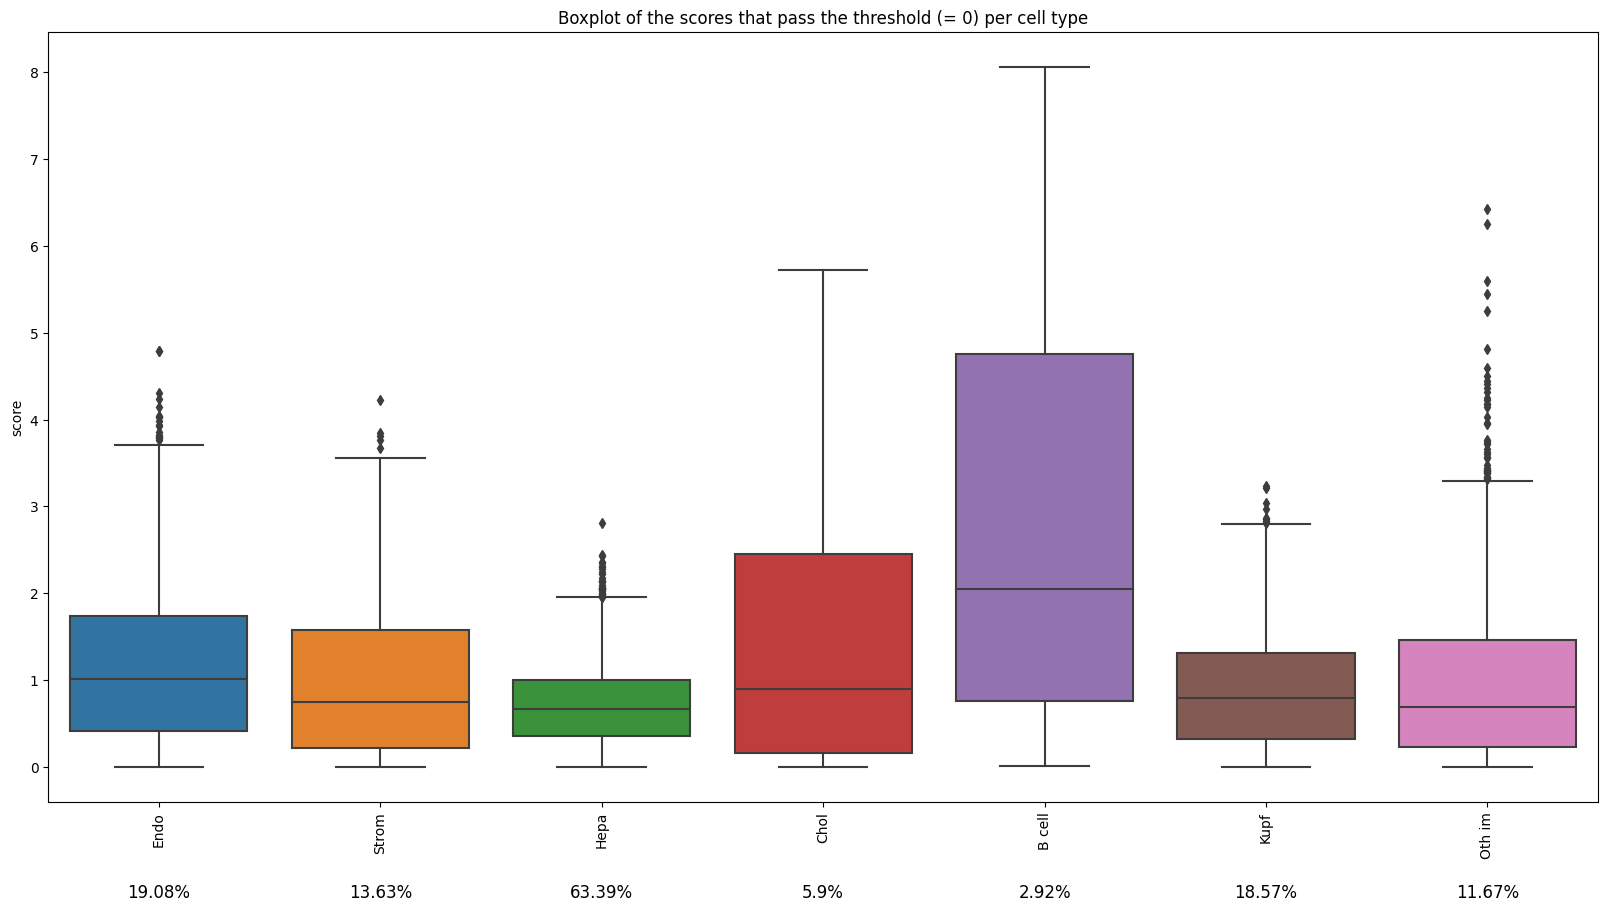

In [10]:
# make boxplot per cell type in ine figure
fig, ax = plt.subplots(1,1,figsize=(20,10))
sns.boxplot(data=score_matrix_atlas_scores_7,ax=ax)
plt.xticks(rotation=90)
plt.title('Boxplot of the scores that pass the threshold (= 0) per cell type')
plt.ylabel('score')
# add to each x label the percentage that is not NaN
for i in range(len(ax.get_xticklabels())):
    ax.text(i,-1.5,str(round(100*sum(score_matrix_atlas_scores_7.iloc[:,i]>0)/len(score_matrix_atlas_scores_7.iloc[:,i]),2))+'%',ha='center', fontsize=12)
plt.show()

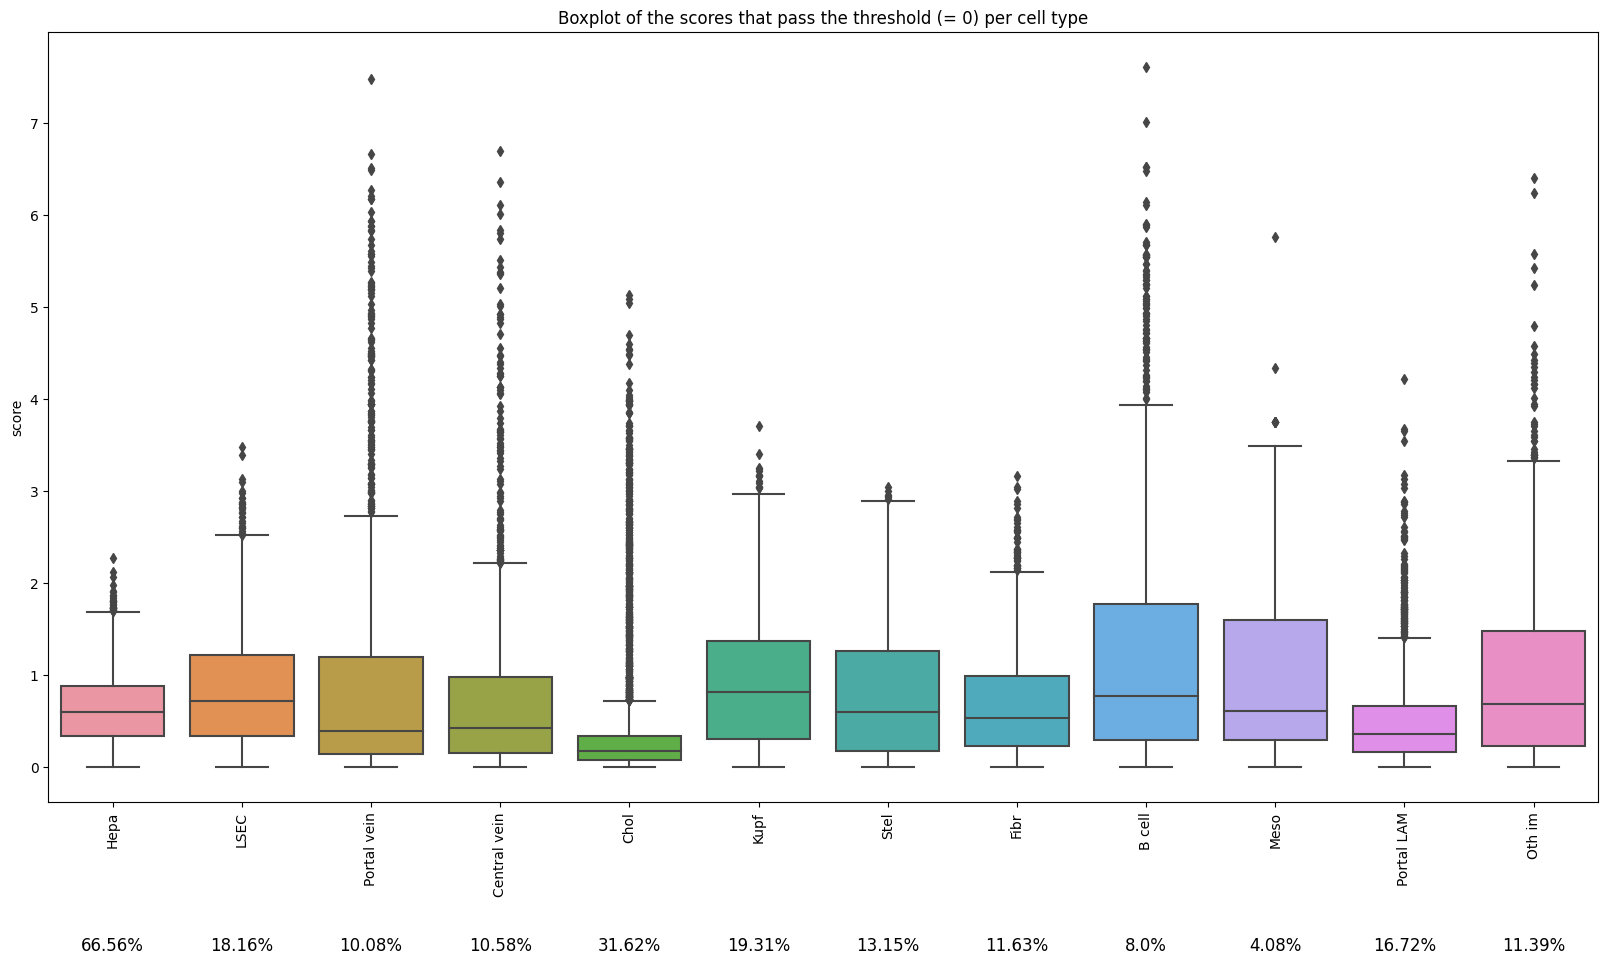

In [11]:
# make boxplot per cell type in ine figure
fig, ax = plt.subplots(1,1,figsize=(20,10))
sns.boxplot(data=score_matrix_Martin,ax=ax)
plt.xticks(rotation=90)
plt.title('Boxplot of the scores that pass the threshold (= 0) per cell type')
plt.ylabel('score')
# add to each x label the percentage that is not NaN
for i in range(len(ax.get_xticklabels())):
    ax.text(i,-2,str(round(100*sum(score_matrix_Martin.iloc[:,i]>0)/len(score_matrix_Martin.iloc[:,i]),2))+'%',ha='center', fontsize=12)
plt.show()
